In [ ]:
# The material used in the assignment are from https://stackoverflow.com/; based on internet users suggestions and collaboration with classmates with more python advanced knowledge. 

In [ ]:
# -- Functions -- # 

In [70]:
from Bio import SeqIO
from Bio import Seq
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.Data import CodonTable
import pandas as pd
import matplotlib as plt
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils import GC
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import urllib
import urllib.request
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
## 1 ##
## Dr. X: this gets sequences 
## Please finish documenting this function with comments, or in notebook markdown text
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.

In [2]:
def get_sequences_from_file(fasta_fn): # Define the get_sequences_from_file function with the fasta_fn file 
    sequence_data_dict = {}  # Create a dictionary named sequence_data_dict 
    for record in SeqIO.parse(fasta_fn, "fasta"): # format the fasta_fn file, and follow the instructions below 
        description = record.description.split() # Create the description function which describes AND splits at space record in the fasta_fn file AND 
        species_name = description[1] + " " + description[2] # create the species_name function: use the description function for the second column AND use the description function for the third column for fasta_fn separate by "". 
        sequence_data_dict[species_name] = record.seq # In the sequence_data_dict dictionary, return the specified species_name conditions with their sequences 
    return(sequence_data_dict) # Print the result for sequence_data_dict dictionary 


In [ ]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions

In [71]:
def translate_function (string_nucleotides): # define the function "translate"
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #Define table with all codon to AA information 
    aa_seq_string = "" # Create new variable for AA sequence 
    for i in range (len(string_nucleotides), 3): #counts in three for codons starting with first nucleotide 
        codon=string_nucleotides[i]+string_nucleotides[i+1]+string_nucleotides[i+2] #Codon is 3 nucleotides which code for AA
         if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG":    #Identifies the stop codons
                break
        else:                                                                       
                aa_seq_string += codon_table.forward_table[codon] #Non stop codons are added to the list as AA 
    return (aa_seq_string) #complete AA sequence with stop codons excluded from analysis
    

IndentationError: unexpected indent (<ipython-input-71-b1ce745e84e8>, line 6)

In [74]:
codon_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(codon_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [ ]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

In [ ]:
def translate_function (string_nucleotides): 
    sequence_translate ={}
    for record in SeqIO.parse (string_nucleotides, "fasta"):
        mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
        sequence_translate = (mito_table[0].seq)
        sequence_translate.translate()
    print (sequence_translate(table=2, to_stop=True))

In [ ]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:

In [17]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight (aa_seq): 
    aa_seq1 =str(aa_seq)
    aa_seq2= aa_seq1(table=2, to_stop=True)
    analysed_seq = ProteinAnalysis (aa_seq2)
    analysed_seq2 = analysed_seq.count_amino_acids () # count the number of amino acids 
    for i in range (analysed_seq2):
        if x == analysed_seq2.molecular_weight: # analyse the molecular weight for each amino acids 
            print (x)

In [ ]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [18]:
def GC_content (DNA_sequence): 
    for record in SeqIO.parse (DNA_sequence,"fasta"): 
        GC = DNA_sequence.count ("G","C")
    return (GC)

In [ ]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

In [ ]:
## 6 ## 
## Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

In [76]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)
bears_df

import numpy as np
idx = 2 
new_col = (np.nan)
bears_df.insert (loc=idx, column = 'Molecular weight', value = new_col)
import numpy as np
idx = 3 
new_col1 = (np.nan)
bears_df.insert (loc=idx, column = 'GC content', value = new_col1)

In [77]:
print (bears_df)

                  species     mass  Molecular weight  GC content
0          Ursus spelaeus  550.800               NaN         NaN
1            Ursus arctos  203.500               NaN         NaN
2        Ursus thibetanus   99.714               NaN         NaN
3        Melursus ursinus  100.030               NaN         NaN
4        Ursus americanus  110.560               NaN         NaN
5     Helarctos malayanus   47.020               NaN         NaN
6  Ailuropoda melanoleuca  118.200               NaN         NaN
7      Tremarctos ornatus  140.700               NaN         NaN
8         Ursus maritimus  425.100               NaN         NaN


In [ ]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame

In [78]:
for bear in bears_df['species']:
    bear_seq = cytb_seqs[bear]
    print(molecular_weight(bear_seq))
    print(GC(bear_seq))

348712.8596000003
43.771929824561404
348796.8787000003
43.771929824561404
348614.69580000016
45.6140350877193
348707.77940000035
45.175438596491226
348766.8559000003
43.94736842105263
348746.8344000003
44.29824561403509
349396.3278000006
40.78947368421053
349059.9576000006
44.3859649122807
348870.8776000003
44.29824561403509


In [92]:
for row_num, row in bears_df.iterrows():
    bear_seq = cytb_seqs[row['species']] 
    bears_df.loc[row_num, 'GC content'] = GC(bear_seq) 
    bears_df.loc[row_num, 'Molecular weight']= molecular_weight(bear_seq)

In [93]:
bears_df

species     mass  Molecular weight  GC content  \
0          Ursus spelaeus  550.800       348712.8596   43.771930   
1            Ursus arctos  203.500       348796.8787   43.771930   
2        Ursus thibetanus   99.714       348614.6958   45.614035   
3        Melursus ursinus  100.030       348707.7794   45.175439   
4        Ursus americanus  110.560       348766.8559   43.947368   
5     Helarctos malayanus   47.020       348746.8344   44.298246   
6  Ailuropoda melanoleuca  118.200       349396.3278   40.789474   
7      Tremarctos ornatus  140.700       349059.9576   44.385965   
8         Ursus maritimus  425.100       348870.8776   44.298246   

   Molecular Weight  
0       348712.8596  
1       348796.8787  
2       348614.6958  
3       348707.7794  
4       348766.8559  
5       348746.8344  
6       349396.3278  
7       349059.9576  
8       348870.8776

In [ ]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.

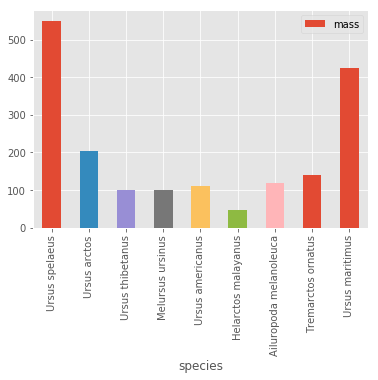

In [86]:
axes = bears_df.plot.bar(x='species', y='mass')

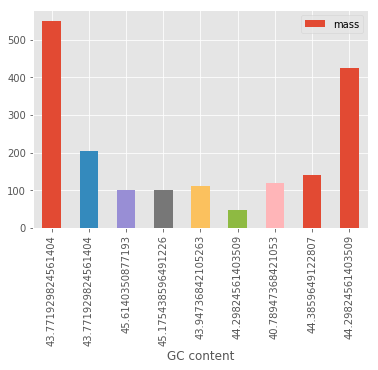

In [95]:
bears_df.plot.bar(x='GC content', y='mass')

In [ ]:
## *Q1* What is the largest bear species? 
## The largest bear is "Ursus spelaeus"
## *Q2* What else is interesting about this species?
## The smallest molecular weight 

In [ ]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

Text(0, 0.5, 'Molecular Weight')

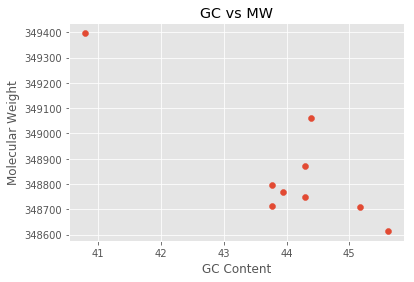

In [102]:
fig, ax =plt.subplots()     
my_scatter_plot =ax.scatter(
bears_df["GC content"],     
bears_df["Molecular Weight"]    
)

plt.title('GC vs MW')
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')